In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
boston = load_boston()
bos_df = pd.DataFrame(boston.data, columns = boston.feature_names)
bos_df['PRICE'] = boston.target

bos_df.describe()

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [4]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# import seaborn as sns
# sns.set_theme(style="ticks")
# rc = {'figure.figsize':(20,20),
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.9',
#       'grid.linestyle':'-.',
#       'font.family':'Times New Roman',
#       'font.size' : 15}
# plt.rcParams.update(rc)
# # df = sns.load_dataset("penguins")
# sns.pairplot(bos_df, hue="PRICE")
# plt.savefig('app/static/pairplot_dataframe.jpg',dpi=300)

C:\Users\np617\AppData\Local\Temp\ipykernel_4652\3979212194.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos_df['PRICE'])


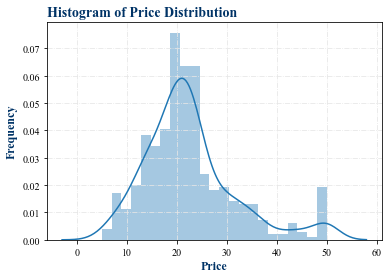

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
sns.distplot(bos_df['PRICE'])
plt.title("Histogram of Price Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("Price", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')
plt.savefig('app/static/price_distribution.jpg',dpi=300)

In [7]:
# from itertools import combinations
# number_of_variables = 4
# for columns_names in combinations(bos_df.columns, number_of_variables):
#     sns.pairplot(bos_df, vars=[columns_names],hue="PRICE",)

# import matplotlib.pyplot as plt
# import seaborn as sns
# rc = {'figure.figsize':(20,20),
#       'axes.facecolor':'white',
#       'axes.grid' : True,
#       'grid.color': '.9',
#       'grid.linestyle':'-.',
#       'font.family':'Times New Roman',
#       'font.size' : 15}
# plt.rcParams.update(rc)
# # sns.distplot(bos_df['PRICE'])
# # plt.title("Histogram of Price Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
# # plt.xlabel("Price", fontsize=12,fontweight='bold',color='#003366')
# # plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')

# from itertools import combinations
# number_of_variables = 4
# for c in combinations(bos_df.columns, number_of_variables):
#     sns.pairplot(bos_df, vars=c,hue="PRICE")
#     filename='_'.join(c)
#     plt.savefig('app/static/plot4/'+filename+'.jpg',dpi=300)
#     plt.close()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train)

print('labels\n', bos_df.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
Coefficients: 
 [-8.60231414e-02  5.21878101e-02  4.23794715e-02  1.85074218e+00
 -1.81958918e+01  3.72537015e+00  4.64043364e-03 -1.37102548e+00
  2.86713450e-01 -1.24043692e-02 -1.00989828e+00  9.24882496e-03
 -5.22006020e-01]
Intercept: 
 37.357193118792246
R2 for Train) 0.7501231420316012
R2 for Test (cross validation) 0.7038001504531058


In [10]:
# import sklearn.metrics as metrics
# def regression_results(y_true, y_pred):

#     # Regression metrics
#     explained_variance=metrics.explained_variance_score(y_true, y_pred)
#     mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
#     mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
#     median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
#     r2=metrics.r2_score(y_true, y_pred)

#     print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
#     print('r2: ', round(r2,4))
#     print('MAE: ', round(mean_absolute_error,4))
#     print('MSE: ', round(mse,4))
#     print('RMSE: ', round(np.sqrt(mse),4))

# regression_results(y_test, lm.predict(X_test))

# coef_list = pd.DataFrame( list(zip(bos_df.columns, lm.coef_)),
#             columns=['features', 'estimatedCoeffs']).T
# coef_list

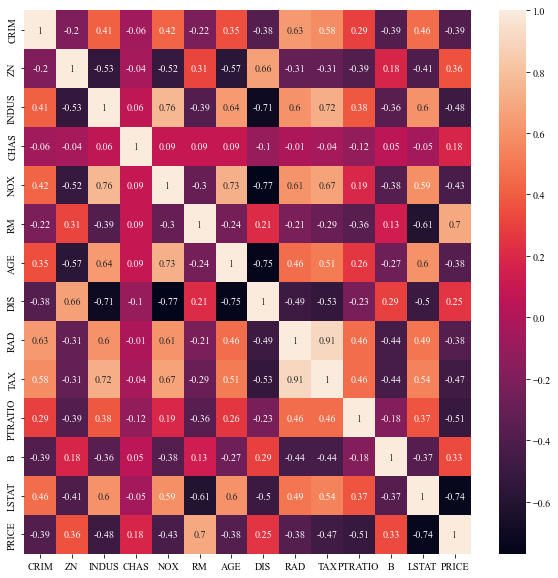

In [11]:
plt.figure(figsize=(10, 10))
correlation_matrix = bos_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('app/static/heatmap_allvar.jpg',dpi=300)

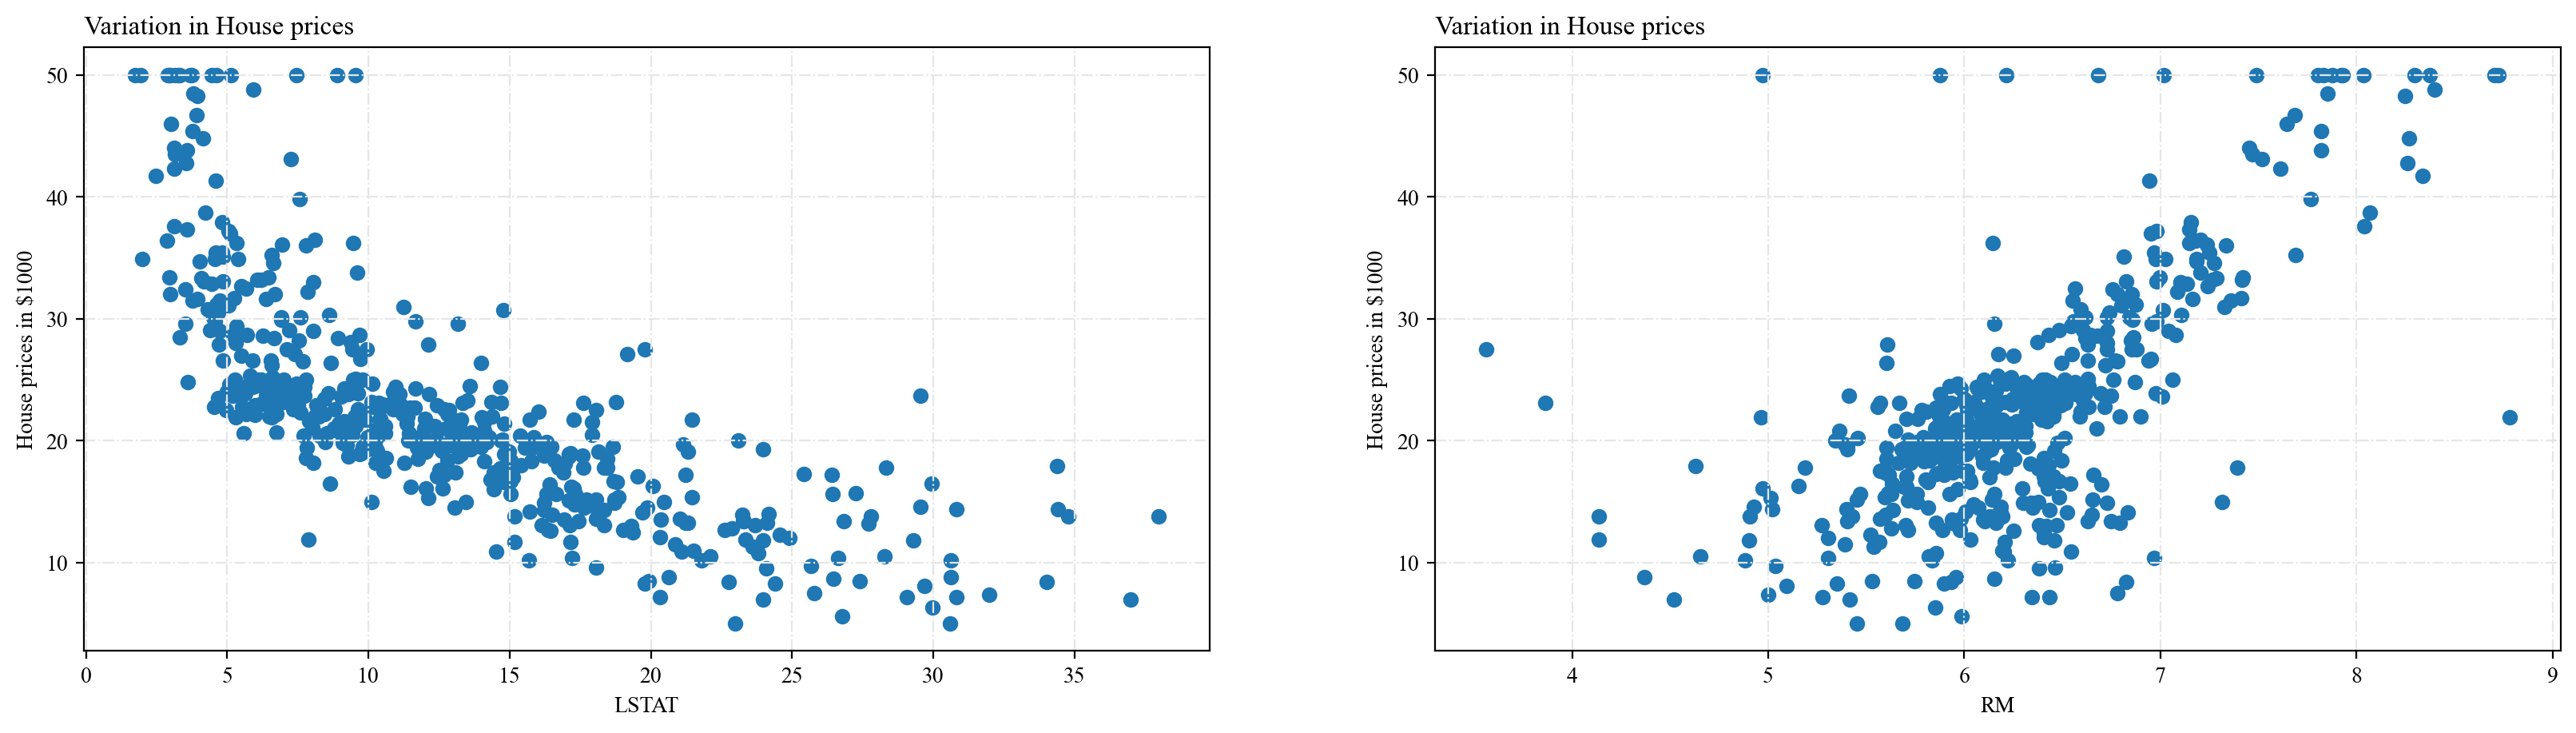

In [12]:
from matplotlib import rcParams

plt.figure(figsize=(20, 5),dpi=200)

features = ['LSTAT', 'RM']
target = bos_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices",loc="Left")
    plt.xlabel(col)
    plt.ylabel('House prices in $1000')

In [13]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(
rows=1, cols=2
# subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)

fig.add_trace(
    go.Scatter(x=bos_df["LSTAT"],y=bos_df['PRICE'],mode='markers',
    marker=dict(
            color="#003366"),
        line=dict(color="#003366",width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=bos_df['RM'],y=bos_df['PRICE'],mode='markers',
    marker=dict(
            color="#FF6600"),
        line=dict(color="#FF6600",width=1)),
    row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
# fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
# Update title and height
fig.update_layout(height=600, width=1400, title_text="Variation in Housing Prices")
output_file="app/static/baseimage.svg"
fig.write_image(output_file,width=1200,engine="kaleido")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Apply Linear Regression Model as Base Model
lr = LinearRegression()
pred_lr = lr.fit(X_train, y_train).predict(X_test)

# Checking Model Metrics
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 Score:  0.7236286907112983
RMSE:  4.945069684726022


In [ ]:
# Get a List of Models as Base Models
def base_models():
  models = dict()
  models['lr'] = LinearRegression()
  models["Ridge"] = Ridge()
  models["Lasso"] = Lasso()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["GBM"] = GradientBoostingRegressor()
  models["XGB"] = XGBRegressor()
  models["LightGBM"] = LGBMRegressor()
  return models

In [ ]:
# Now we will apply K Fold Cross Validation. We will now create a evaluate function with Repeated Stratified K Fold
# And Capture the Cross Val Score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, boston.data, boston.target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [ ]:
# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>lr 3.391 (0.530)
>Ridge 3.382 (0.519)
>Lasso 3.711 (0.549)
>Tree 2.871 (0.528)
>Random Forest 2.209 (0.355)
>Bagging 2.362 (0.385)
>GBM 2.095 (0.279)
>XGB 2.109 (0.320)
>LightGBM 2.172 (0.400)


In [ ]:
regressmod = pd.DataFrame(np.transpose(results), columns = ["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "XGB","LightGBM"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "XGB","LightGBM"])
regressmod

,index,variable,value
0,0,lr,3.745638
1,1,lr,3.691066
2,2,lr,2.304415
3,3,lr,4.416883
4,4,lr,2.700048
...,...,...,...
265,25,LightGBM,2.592063
266,26,LightGBM,2.005920
267,27,LightGBM,1.841656
268,28,LightGBM,2.331108


In [ ]:
fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()
fig.write_image("app/static/Boxplot.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)


In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('Tree', DecisionTreeRegressor()))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor()))
  level0.append(('Bagging', BaggingRegressor()))
	# define meta learner model
  level1 = LGBMRegressor()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
def base_models():
  models = dict()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["XGB"] = XGBRegressor()
  models["Stacked Model"] = get_stacking()
  return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, boston.data, boston.target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [ ]:
# get the models to evaluate
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

regressmod = pd.DataFrame(np.transpose(results), columns = ["Tree","Random Forest","Bagging","XGB","Stacked Reg"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["Tree","Random Forest","Bagging","XGB","Stacked Reg"])
fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()
fig.write_image("app/static/Boxplot_candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

>Tree 2.870 (0.493)
>Random Forest 2.197 (0.365)
>Bagging 2.291 (0.377)
>XGB 2.109 (0.320)
>Stacked Model 2.774 (0.351)


In [ ]:
from joblib import dump, load
dump(models, "stacked-models.joblib")

['stacked-models.joblib']

In [ ]:
X_test[9]

array([1.35222e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
       3.86300e+00, 1.00000e+02, 1.51060e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 1.31420e+02, 1.33300e+01])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))
level0.append(("XGB", XGBRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
model.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('Tree', DecisionTreeRegressor()),
                              ('RF', RandomForestRegressor()),
                              ('GBM', GradientBoostingRegressor()),
                              ('Bagging', BaggingRegressor()),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
         

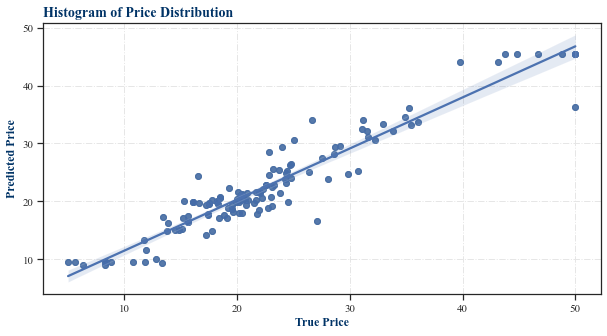

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

y_pred = model.predict(X_test)
pricecompare = pd.DataFrame({"Actual Price":y_test, "Predicted Price":y_pred})
plt.scatter(y_test,y_pred, color='#003366',alpha=0.6)
ax = sns.regplot(x="Actual Price", y="Predicted Price", data=pricecompare, scatter_kws={'alpha':0.6})
plt.title("True vs Predicted Housing Prices", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("True Price", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Predicted Price", fontsize=12,fontweight='bold',color='#003366')
plt.savefig('app/static/Price_prediction.jpg',dpi=300)
plt.show()

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "app/TrainedModel/StackedPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 91.15 %


In [ ]:
# boston.data[1]
np.set_printoptions(suppress=True)
print(boston.data[9])
# print(boston.data.reshape(1, -1))
# print(boston.data.reshape(1, -1)[0][0])

[  0.17004  12.5       7.87      0.        0.524     6.004    85.9
   6.5921    5.      311.       15.2     386.71     17.1    ]


In [ ]:
def hello_world():
    boston = load_boston()
    pkl_filename = "app/TrainedModel/StackedPickle.pkl"
    testvalue = boston.data[1].reshape(1, -1)
    test_input = testvalue
    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
    predict = pickle_model.predict(test_input)
    predict_as_str = str(predict)
    return predict_as_str

hello_world()

'[22.59710588]'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))
level0.append(("XGB", XGBRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
model.fit(X_train, y_train)

def plot_graphs(model,new_input_arr, output_file):
    data = load_boston()
    df = pd.DataFrame(data.data, columns = data.feature_names)
    df['PRICE'] = data.target

    fig = make_subplots(
    rows=1, cols=2
    # subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
    )

    fig.add_trace(
        go.Scatter(x=df["LSTAT"],y=df['PRICE'],mode='markers',
        marker=dict(
                color="#003366"),
            line=dict(color="#003366",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df['RM'],y=df['PRICE'],mode='markers',
        marker=dict(
                color="#FF6600"),
            line=dict(color="#FF6600",width=1)),
        row=1, col=2
    )

    new_preds = model.predict(new_input_arr)
    # print(new_preds)
    RM_input = np.array(new_input_arr[0][5])
    # print(RM_input)
    LSTAT_input =np.array(new_input_arr[0][12])
    # print(LSTAT_input)

    fig.add_trace(
    go.Scatter(
        x=LSTAT_input,
        y=new_preds,
        mode='markers', name="Predicted Output",
        marker=dict(
            color="#FFCC00",size=15),
        line=dict(color="#FFCC00",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=RM_input,
            y=new_preds,
            mode='markers', name="Predicted Output",
            marker=dict(
                color="#6600cc",size=15),
            line=dict(color="red",width=1)),
            row=1, col=2
    )

    # Update xaxis properties
    fig.update_xaxes(title_text="Lower State Population (%)", row=1, col=1)
    fig.update_xaxes(title_text="Number of Rooms", row=1, col=2)

    # Update yaxis properties
    fig.update_yaxes(title_text="House Prices ($1000)", row=1, col=1)
    # fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
    # Update title and height
    fig.update_layout(height=600, width=1400, title_text="Variation in Housing Prices")
    output_file="app/static/scatterplot.svg"
    fig.write_image(output_file,width=1200,engine="kaleido")
    fig.show()

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['PRICE'] = data.target
testvalue = boston.data[1].reshape(1, -1)
plot_graphs(model,new_input_arr=testvalue,output_file="app/static/scatterplot.svg")

In [ ]:
def floatsome_to_np_array(floats_str):
  def is_float(s):
    try:
      float(s)
      return True
    except:
      return False
  floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
  return floats.reshape(len(floats), 1)

floatsome_to_np_array("1, 222, 3, 6, 4, ")

array([[  1.],
       [222.],
       [  3.],
       [  6.],
       [  4.]])

In [ ]:
floatsome_to_np_array("1, 222, 3, 6, 4, ").reshape(1, -1)

array([[  1., 222.,   3.,   6.,   4.]])